# Student Academic Performance Dataset 

Predicting student academic performance is essential for improving educational outcomes and providing timely support to learners. This project uses the Student Academic Performance dataset to analyze key factors influencing students’ final results. By applying machine learning classification models such as Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting, the system aims to accurately predict whether a student will pass or fail. The project demonstrates how data-driven approaches can support effective decision-making in the education domain.

## Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Load the Dataset

In [4]:
df = pd.read_csv("D:\DATASCIENCE\Projects\Student Academic Performance Dataset.csv")
df.head()


,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass


## Display the first 5 rows 

In [5]:
df.head(5)

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass


## Display the last 5 rows  

In [6]:
df.tail(5)

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
995,S996,Student_996,Female,15,10,76,75,55,94.127440,Bachelor's,2.212263,Yes,Free or reduced,No,Fail
996,S997,Student_997,Female,17,12,83,68,98,86.911592,Bachelor's,3.552898,No,Free or reduced,Yes,Fail
997,S998,Student_998,Other,16,10,60,77,92,80.139645,PhD,2.400027,No,Free or reduced,No,Pass
998,S999,Student_999,Other,17,9,94,66,97,88.069619,PhD,4.713490,No,Free or reduced,Yes,Pass
999,S1000,Student_1000,Male,17,9,96,92,93,84.695088,PhD,1.262504,No,Free or reduced,Yes,Pass


## Data Understanding 

In [7]:
df.shape

(1000, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   gender            1000 non-null   object 
 3   age               1000 non-null   int64  
 4   grade_level       1000 non-null   int64  
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   attendance_rate   1000 non-null   float64
 9   parent_education  1000 non-null   object 
 10  study_hours       1000 non-null   float64
 11  internet_access   1000 non-null   object 
 12  lunch_type        1000 non-null   object 
 13  extra_activities  1000 non-null   object 
 14  final_result      1000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 117.3+ KB


In [9]:
df.describe()

,age,grade_level,math_score,reading_score,writing_score,attendance_rate,study_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,15.999000,10.473000,75.165000,74.293000,75.150000,89.879179,2.978380
std,0.817109,1.136029,14.304349,14.312652,14.395094,5.725007,1.167780
min,15.000000,9.000000,50.000000,50.000000,50.000000,80.000614,1.015673
25%,15.000000,9.000000,63.000000,62.000000,63.000000,84.971772,1.955287
50%,16.000000,10.000000,75.000000,74.000000,75.000000,89.980889,2.962665
75%,17.000000,12.000000,88.000000,86.000000,88.000000,94.629778,3.994360
max,17.000000,12.000000,99.000000,99.000000,99.000000,99.954988,4.997843


## Check Missing Values 

In [10]:
df.isnull().sum()

student_id          0
name                0
gender              0
age                 0
grade_level         0
math_score          0
reading_score       0
writing_score       0
attendance_rate     0
parent_education    0
study_hours         0
internet_access     0
lunch_type          0
extra_activities    0
final_result        0
dtype: int64

## Encode Categorical Data 

In [11]:
df = df.drop(columns=['student_id'], errors='ignore')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


## Feature Selection

In [12]:
X = df.drop('final_result', axis=1)
y = df['final_result']


## Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Feature Scaling 

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Training Models

In [15]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)


# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)


## Evaluate the Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def evaluate(name, y_test, y_pred):
    print(name)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-"*30)

evaluate("Logistic Regression", y_test, lr_pred)
evaluate("Decision Tree", y_test, dt_pred)
evaluate("Random Forest", y_test, rf_pred)
evaluate("Gradient Boosting", y_test, gb_pred)


Logistic Regression
Accuracy : 0.455
Precision: 0.48936170212765956
Recall   : 0.6509433962264151
F1-score : 0.5587044534412956
Confusion Matrix:
[[22 72]
 [37 69]]
------------------------------
Decision Tree
Accuracy : 0.535
Precision: 0.5607476635514018
Recall   : 0.5660377358490566
F1-score : 0.5633802816901408
Confusion Matrix:
[[47 47]
 [46 60]]
------------------------------
Random Forest
Accuracy : 0.545
Precision: 0.5700934579439252
Recall   : 0.5754716981132075
F1-score : 0.5727699530516431
Confusion Matrix:
[[48 46]
 [45 61]]
------------------------------
Gradient Boosting
Accuracy : 0.575
Precision: 0.5897435897435898
Recall   : 0.6509433962264151
F1-score : 0.6188340807174887
Confusion Matrix:
[[46 48]
 [37 69]]
------------------------------


## Model Comparison Graph

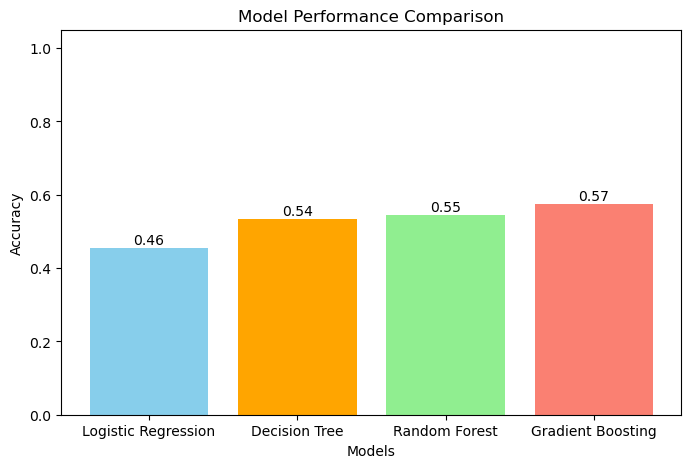

In [17]:
from sklearn.metrics import accuracy_score
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, dt_pred), 
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, gb_pred)
]
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['skyblue', 'orange', 'lightgreen', 'salmon'])
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{acc:.2f}", ha='center', fontsize=10)

plt.ylim(0, 1.05)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()


## Visualize Feature Importance

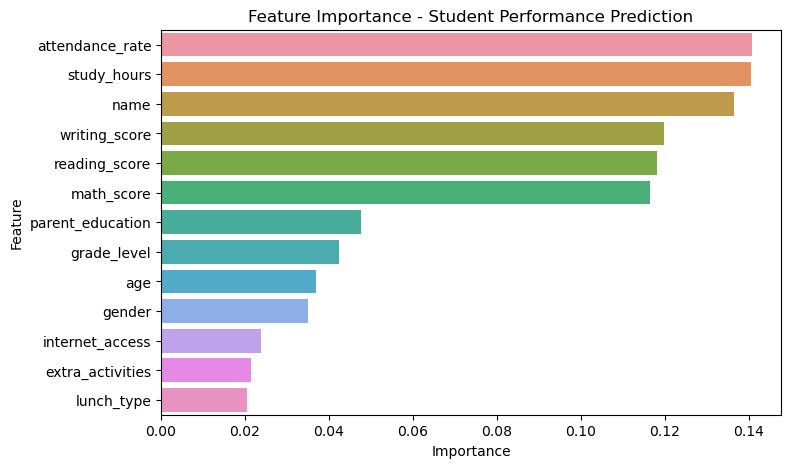

In [18]:

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance - Student Performance Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## Prediction on New Data 

In [19]:
new_student_df = pd.DataFrame(columns=X_train.columns)
new_student_df.loc[0] = [1, 17, 5, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0]  

new_student_scaled = scaler.transform(new_student_df)

predicted_result = rf.predict(new_student_scaled)

if predicted_result[0] == 1:
    print("Predicted Result: Pass")
else:
    print("Predicted Result: Fail")


Predicted Result: Pass


##  Conclusion

In this project, a comprehensive analysis of the Student Academic Performance dataset was carried out to predict students’ final results using machine learning techniques. The dataset was successfully cleaned, transformed, and prepared for model training through encoding and feature scaling. Several classification models were trained and evaluated to compare their predictive performance.

Among the implemented models, ensemble methods such as Random Forest and Gradient Boosting showed better accuracy and reliability compared to basic models like Logistic Regression and Decision Tree. The feature importance analysis provided valuable insights into the key factors influencing student outcomes, which can help educators focus on areas that need improvement.

Overall, this project highlights the effectiveness of machine learning in predicting academic performance and supports its potential use in educational analytics. With further improvements such as larger datasets, advanced models, and real-time data integration, this system can be enhanced to provide early intervention strategies and personalized learning support for students.